In [92]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
px.defaults.template = "plotly_white"
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

# METADATA
| Column name             | Description                                              | Type    |
| ----------------------- | -------------------------------------------------------- | ------- |
| CLIENTNUM               | Unique identifier for each customer                     | Integer |
| Attrition_Flag          | Flag indicating whether or not the customer has churned out | Boolean |
| Customer_Age            | Age of customer                                          | Integer |
| Gender                  | Gender of customer                                      | String  |
| Dependent_count         | Number of dependents that the customer has             | Integer |
| Education_Level         | Education level of the customer                         | String  |
| Marital_Status          | Marital status of the customer                           | String  |
| Income_Category         | Income category of the customer                          | String  |
| Card_Category           | Type of card held by the customer                        | String  |
| Months_on_book          | How long the customer has been on the books             | Integer |
| Total_Relationship_Count | Total number of relationships the customer has with the credit card provider | Integer |
| Months_Inactive_12_mon  | Number of months the customer has been inactive in the last twelve months | Integer |
| Contacts_Count_12_mon   | Number of contacts the customer has had in the last twelve months | Integer |
| Credit_Limit            | Credit limit of the customer                            | Integer |
| Total_Revolving_Bal     | Total revolving balance of the customer                 | Integer |
| Avg_Open_To_Buy         | Average open-to-buy ratio of the customer                | Integer |
| Total_Amt_Chng_Q4_Q1    | Total amount changed from quarter 4 to quarter 1       | Integer |
| Total_Trans_Amt         | Total transaction amount                                | Integer |
| Total_Trans_Ct          | Total transaction count                                 | Integer |
| Total_Ct_Chng_Q4_Q1     | Total count changed from quarter 4 to quarter 1        | Integer |
| Avg_Utilization_Ratio   | Average utilization ratio of the customer              | Integer |



In [93]:
#Loading the dataset
df = pd.read_csv("/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv")
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 10127


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

#### For more information about the dataset, please visit: 

https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/data 

# DATA CLEANING

#### In this section:
- Data cleaning
- Feature Engineering

In [94]:
# information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

- There is no missing value, but there are many rows with value(s) labeled as 'Unknown'. 
- There are some categorical features in the data frame (features in dtype: object). Therefore, I will need to encode them into numeric forms for later use.

Firstly, I will simply drop the rows that have value(s) labeled as unknown

In [95]:
df = df[df != 'Unknown'].dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 7081


I will encode the Attrition_Flag column with integer values (i.e., 0 for Existing Customer and 1 for 
Attrited Customer) 

In [96]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

Now, I will be exploring the unique values in some categorical features to get a clear idea of the data.

In [97]:
print("Total categories in the feature Education_Level:\n", df["Education_Level"].value_counts(), "\n")
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Income_Category:\n", df["Income_Category"].value_counts(), "\n")
print("Total categories in the feature Card_Category:\n", df["Card_Category"].value_counts(), "\n")

Total categories in the feature Education_Level:
 Education_Level
Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: count, dtype: int64 

Total categories in the feature Marital_Status:
 Marital_Status
Married     3564
Single      2948
Divorced     569
Name: count, dtype: int64 

Total categories in the feature Income_Category:
 Income_Category
Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: count, dtype: int64 

Total categories in the feature Card_Category:
 Card_Category
Blue        6598
Silver       391
Gold          81
Platinum      11
Name: count, dtype: int64 



In [98]:
# Dropping redundant feature
df = df.drop('CLIENTNUM', axis=1)

Now, let's take a look at the data's statistics

In [99]:
df.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count     7081.000000   7081.000000      7081.000000     7081.000000   
mean         0.157181     46.347691         2.337805       35.981359   
std          0.363997      8.041225         1.291649        8.002609   
min          0.000000     26.000000         0.000000       13.000000   
25%          0.000000     41.000000         1.000000       31.000000   
50%          0.000000     46.000000         2.000000       36.000000   
75%          0.000000     52.000000         3.000000       40.000000   
max          1.000000     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               7081.000000             7081.000000   
mean                   3.819376                2.342607   
std                    1.544444                0.995104   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            7081.000000   7081.000000          7081.000000   
mean                2.454456   8492.773831          1167.501624   
std                 1.104917   9126.072520           812.315606   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2498.000000           463.000000   
50%                 2.000000   4287.000000          1282.000000   
75%                 3.000000  10729.000000          1781.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      7081.000000           7081.000000      7081.000000     7081.000000   
mean       7325.272207              0.760584      4394.299816       64.503319   
std        9131.217585              0.223139      3468.461606       23.809330   
min           3.000000              0.000000       510.000000       10.000000   
25%        1248.000000              0.629000      2089.000000       44.000000   
50%        3250.000000              0.735000      3831.000000       67.000000   
75%        9491.000000              0.858000      4740.000000       80.000000   
max       34516.000000              3.397000     17995.000000      134.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count          7081.000000            7081.000000   
mean              0.711508               0.282313   
std               0.238693               0.278731   
min               0.000000               0.000000   
25%               0.583000               0.026000   
50%               0.700000               0.186000   
75%               0.818000               0.515000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                        7081.000000                                                                                    
mean                                            0.156531                                                                                    
std                                             0.362068                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                        

The statistics show some discrepancies in:
- mean Credit_Limit/max Credit_Limit
- mean Total_Trans_Amt/max Total_Trans_Amt
- mean Avg_Utilization_Ratio/max Avg_Utilization_Ratio.

To have a broader view of the data. I will plot some of the selected features.

In [100]:
numerical_cols = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
categorical_cols = ['Attrition_Flag', 'Gender', 'Dependent_count', 'Marital_Status', 'Education_Level', 'Income_Category', 'Card_Category', 'Total_Relationship_Count',
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

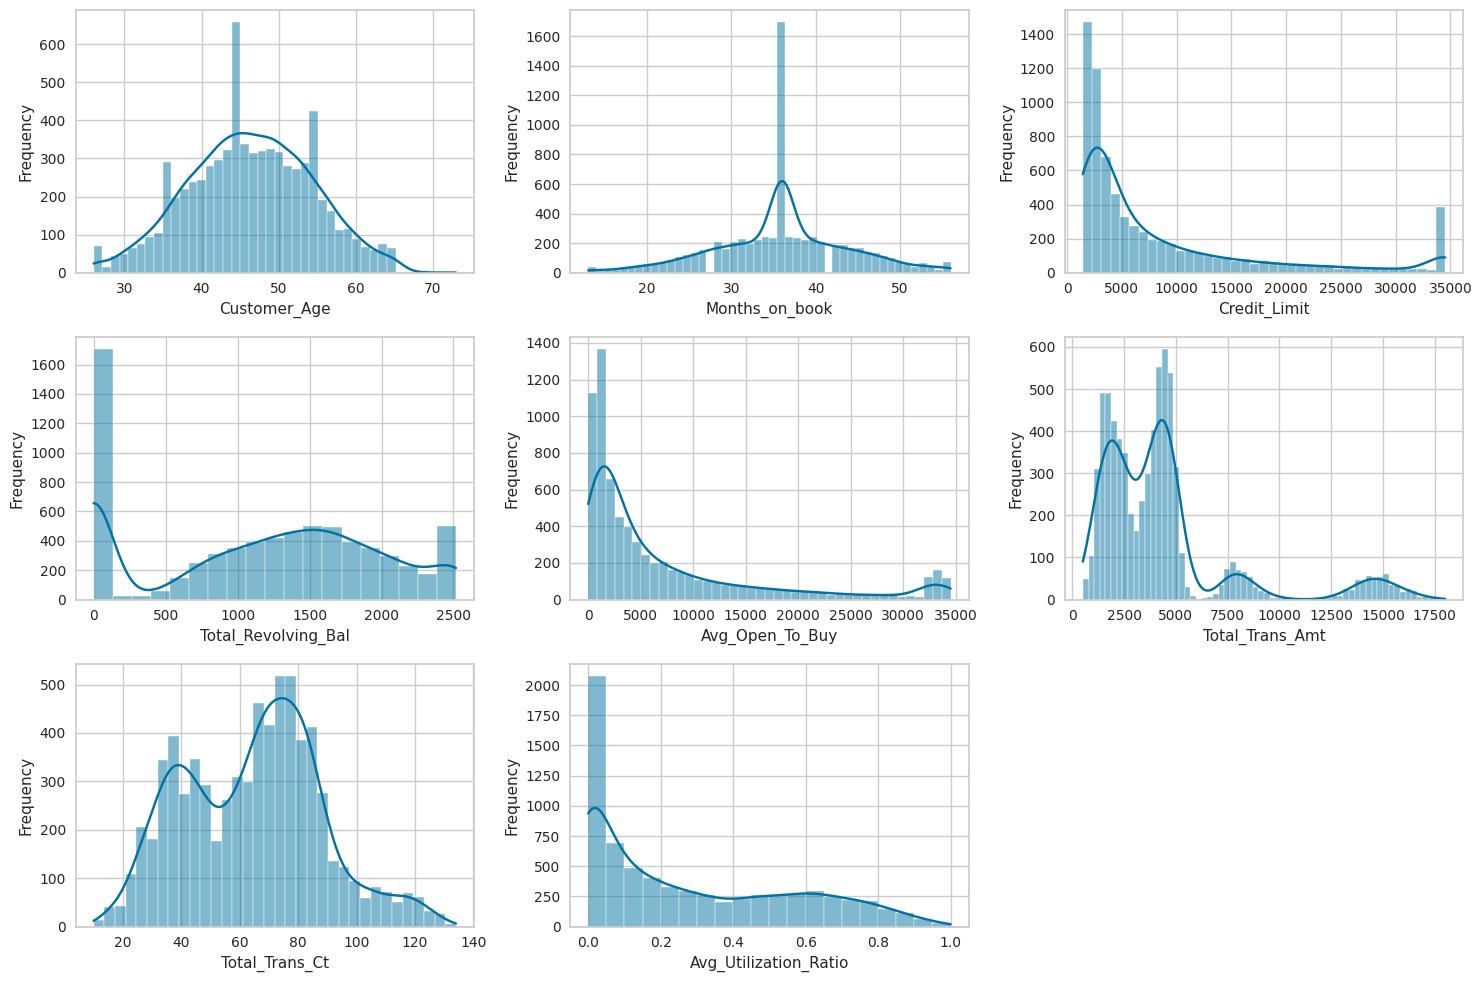

In [101]:
# Create histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 800x550 with 0 Axes>

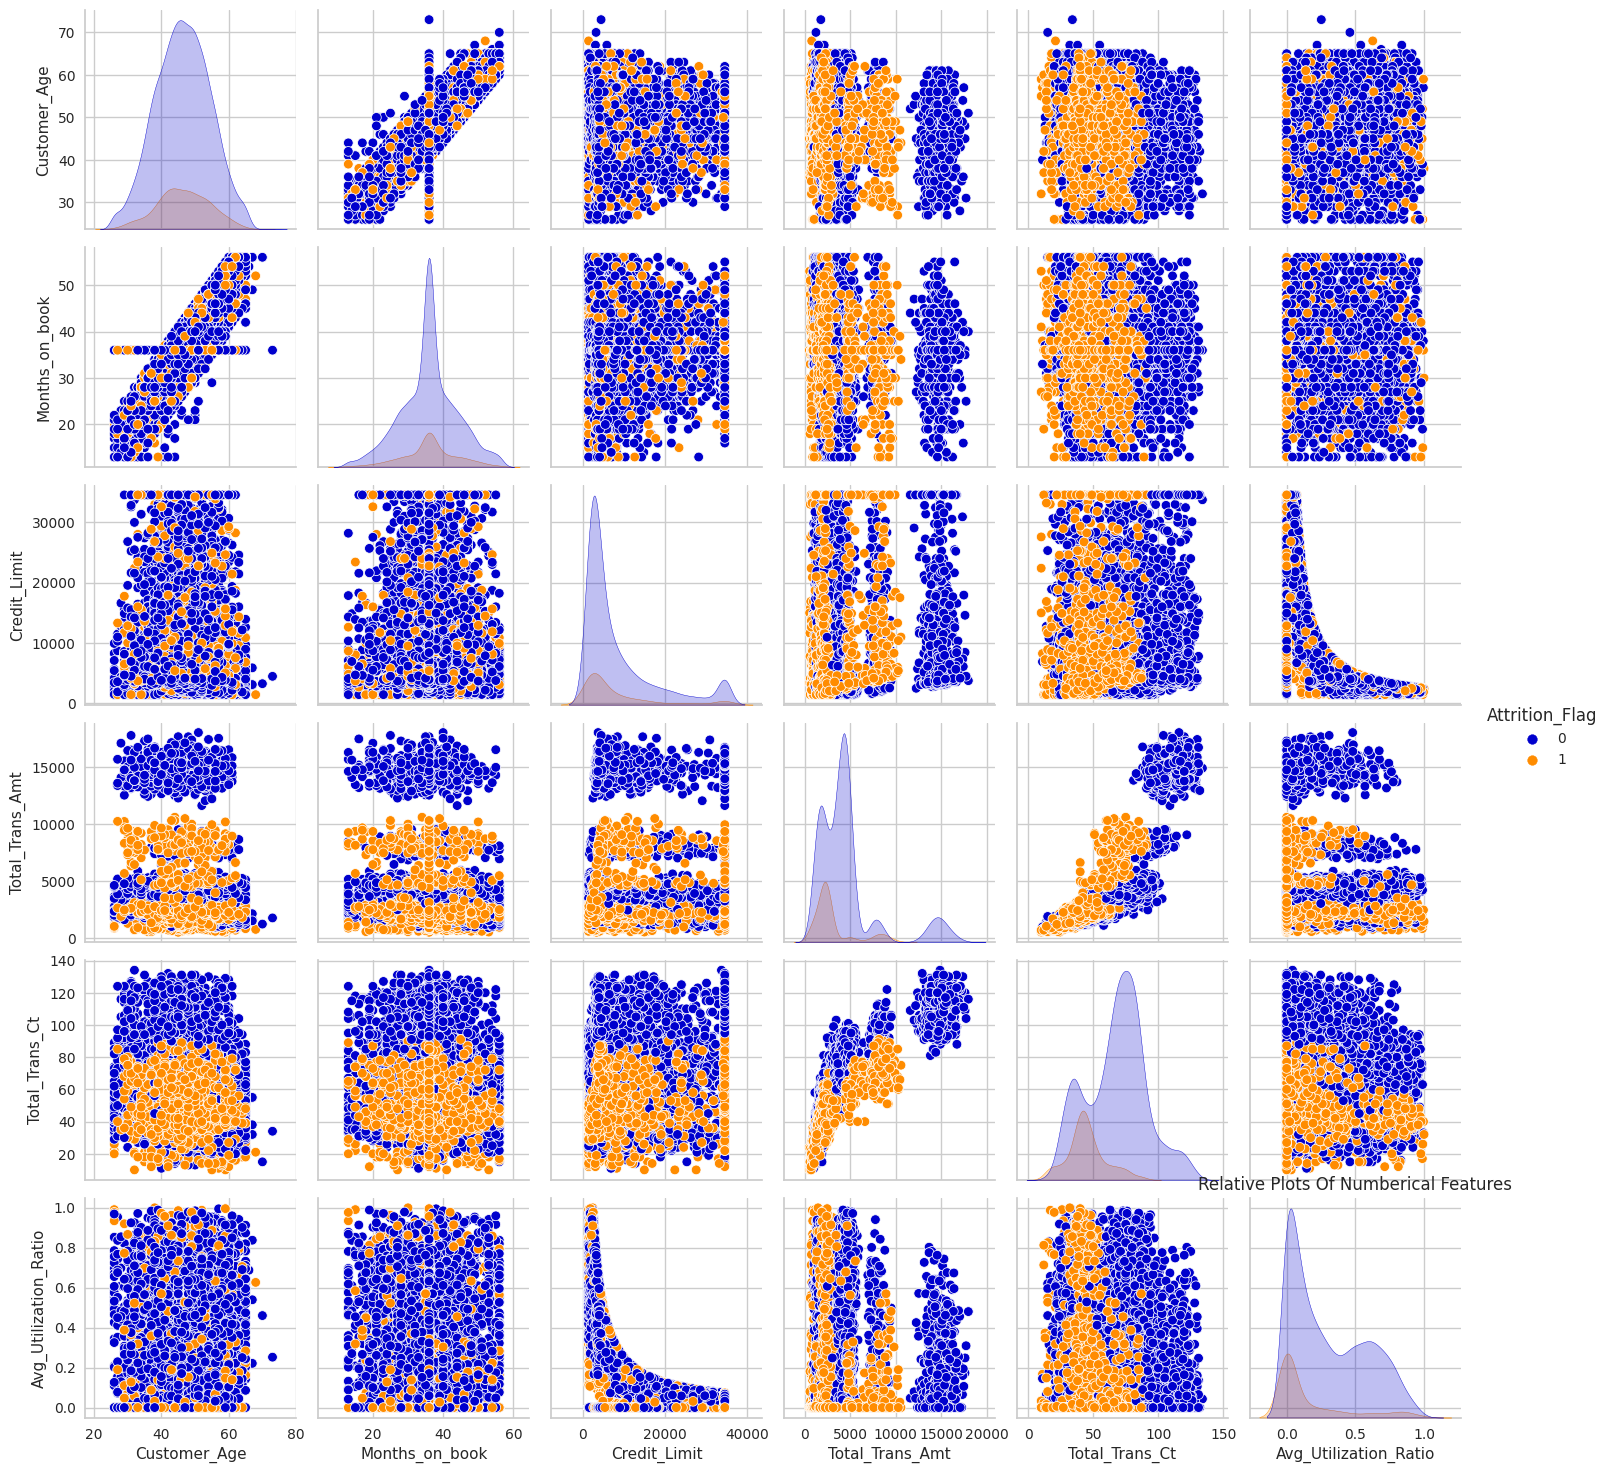

In [102]:
#Plotting relationships between some major numerical features
plt.figure();
sns.pairplot(df, vars=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'], hue='Attrition_Flag', palette= (["mediumblue","darkorange"]));
plt.title('Relative Plots Of Numberical Features');
plt.show();

There are also some noticable clusters in Total_Trans_Amt/Total_Trans_Ct graph. This information will be helpful for later on

Next, I take a look at the correlation between numerical features

In [103]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df[numerical_cols].corr().round(2)
    f, ax = plt.subplots(figsize=(10,5))
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')

/tmp/ipykernel_32/1580151607.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



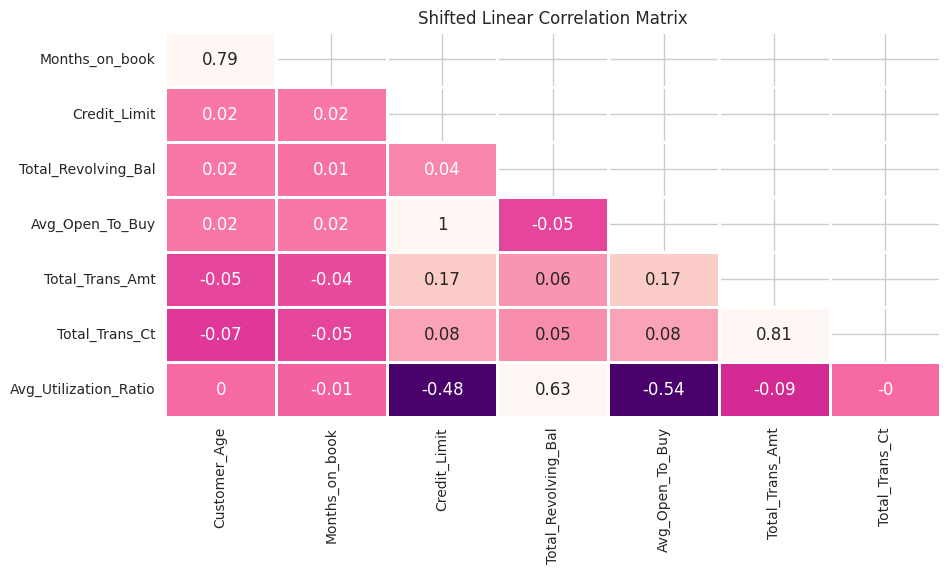

In [104]:
corrMat(df);

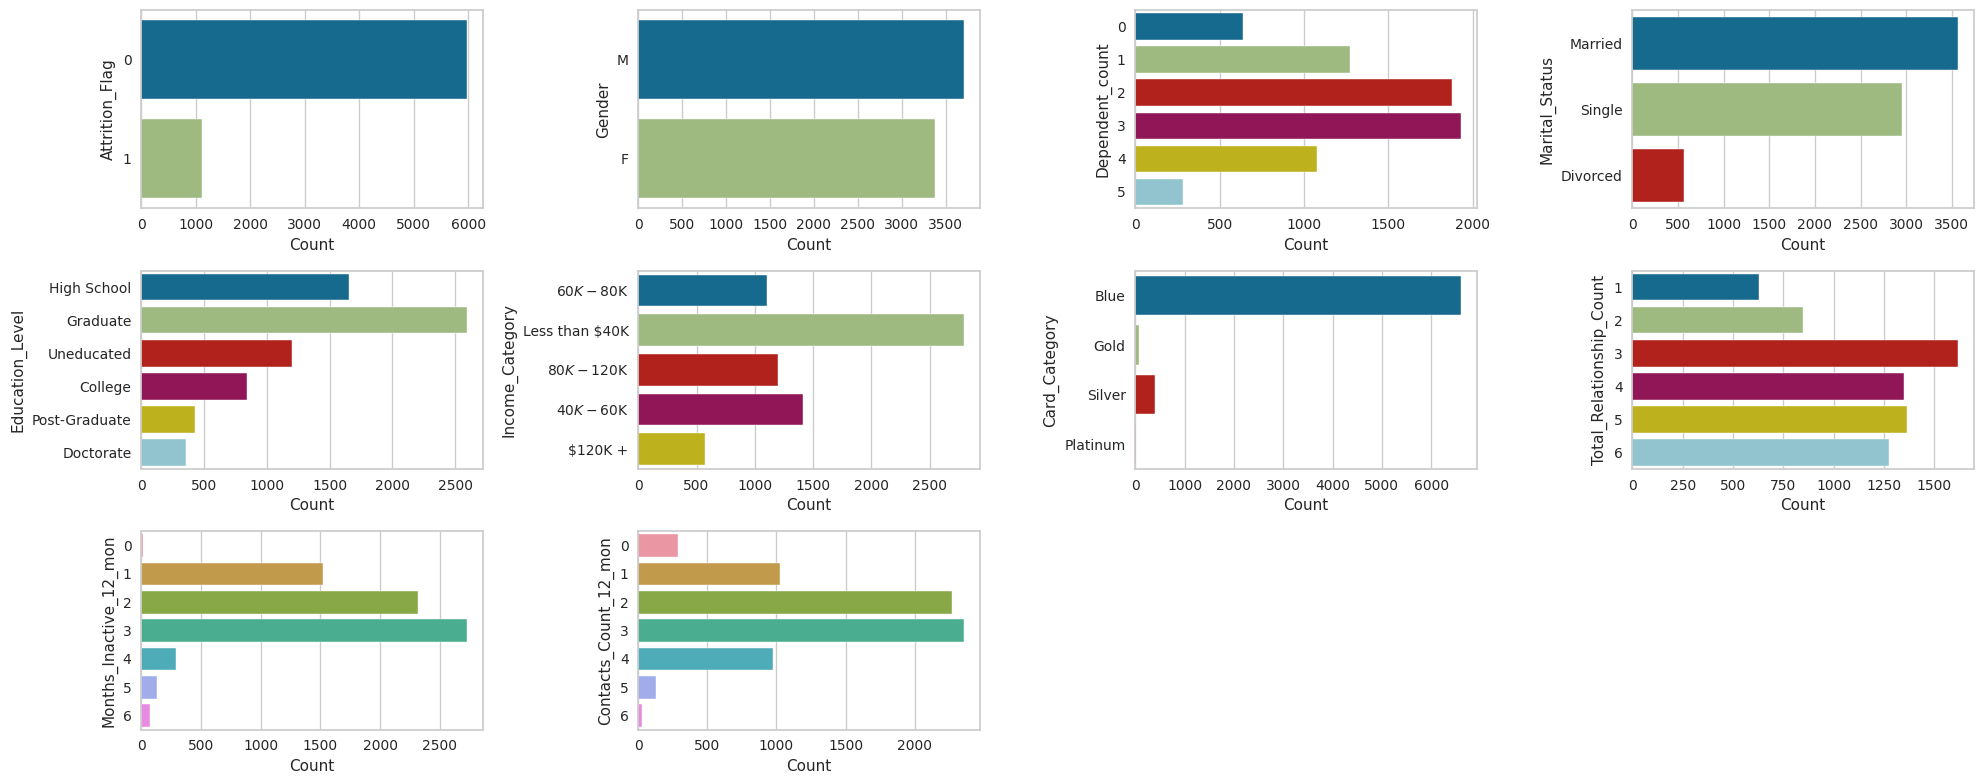

In [105]:
# Create horizontal bar charts for categorical variables
plt.figure(figsize=(20, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, y=col)
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

The data is now pretty clean and relationships between features have been visualized. I will continue to the next step: prepocessing the data to 
prepare for clustering

# DATA PREPROCESSING
In this section, I will process the data to prepare for clustering. The course of actions include:
- Label encoding the categorical features using the label encoder
- Scale the features using the standard scaler
- Perform dimensionality reduction using PCA

In [106]:
# list of categorical variables to scale
to_scale = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
print("Categorical variables to scale:", to_scale)

Categorical variables to scale: ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [107]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in to_scale:
    df[i]=df[[i]].apply(LE.fit_transform)

print('All categorical features are now numerical')

All categorical features are now numerical


In [108]:
# Create a sub dataframe that will be used for modelling
sub_df = df[['Customer_Age', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Months_on_book', 
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']]

print('Final dataframe to use for modeling:')
sub_df.head()


Final dataframe to use for modeling:


Customer_Age  Dependent_count  Education_Level  Marital_Status  \
0            45                3                3               1   
1            49                5                2               2   
2            51                3                2               1   
4            40                3                5               1   
5            44                2                2               1   

   Income_Category  Months_on_book  Total_Relationship_Count  \
0                2              39                         5   
1                4              44                         6   
2                3              36                         4   
4                2              21                         5   
5                1              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Trans_Amt  Total_Trans_Ct  
0             1144              42  
1             1291              33  
2             1887              20  
4              816              28  
5             1088              24

In [109]:
#Scaling
scaler = StandardScaler()
scaler.fit(sub_df)
scaled_sub_df = pd.DataFrame(scaler.transform(sub_df),columns= sub_df.columns )

print("All features in the sub dataframe are now scaled")
scaled_sub_df.head()

All features in the sub dataframe are now scaled


Customer_Age  Dependent_count  Education_Level  Marital_Status  \
0     -0.167610         0.512710         0.285484       -0.542306   
1      0.329862         2.061228        -0.388353        1.071846   
2      0.578598         0.512710        -0.388353       -0.542306   
3     -0.789449         0.512710         1.633157       -0.542306   
4     -0.291978        -0.261549        -0.388353       -0.542306   

   Income_Category  Months_on_book  Total_Relationship_Count  \
0        -0.431950        0.377234                  0.764487   
1         1.014215        1.002074                  1.412015   
2         0.291133        0.002330                  0.116959   
3        -0.431950       -1.872192                  0.764487   
4        -1.155033        0.002330                 -0.530569   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0               -1.349309               0.493777      0.460058   
1               -1.349309              -0.411332     -0.025947   
2               -1.349309              -2.221550     -0.556114   
3               -1.349309              -2.221550     -0.413874   
4               -1.349309              -0.411332     -0.491240   

   Total_Trans_Amt  Total_Trans_Ct  
0        -0.937167       -0.945214  
1        -0.894783       -1.323244  
2        -0.722936       -1.869287  
3        -1.031741       -1.533260  
4        -0.953314       -1.701273

# DIMENSIONALITY REDUCTION

In the sub dataframe, many features will determine the classification of datapoints. Dealing with 12 features as we have right now can be challenging, as many of them exhibit correlations, which can lead to multicollinearity and redundancy. Therefore, I will use Principal Component Analysis (PCA) to reduce the features to 3-dimension.

**Principal component analysis (PCA)** is a technique for reducing the dimensions of large datasets, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data

In [110]:
# Use PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca.fit(scaled_sub_df)
PCA_df = pd.DataFrame(pca.transform(scaled_sub_df), columns=(["dim1","dim2", "dim3"]))
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
dim1  7081.0  0.000000e+00  1.453175 -3.431935 -0.963172 -0.156101  0.623750   
dim2  7081.0  0.000000e+00  1.347004 -4.026731 -0.914064  0.015981  0.912059   
dim3  7081.0 -1.605520e-17  1.137600 -2.254650 -0.955593 -0.068597  0.712030   

           max  
dim1  4.934063  
dim2  4.073914  
dim3  4.134892

In [111]:
# 3D plotting 
fig = px.scatter_3d(PCA_df, x='dim1', y='dim2', z='dim3', color_discrete_sequence=['blue'])

# Adjust the size of the data points
fig.update_traces(marker=dict(size=2))

fig.update_layout(title="3D Projection Of Data In The Reduced Dimension", height=600, width=800)
fig.show()

# CLUSTERING
After reducing 12 features of the sub dataframe to 3-dimension, I will perform clustering using K-Means Clustering algorithm.

K-means clustering is a partitioning technique that groups data points into K distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean.

The course of actions includes:
- Determine the number of clusters using the Elbow method
- Cluster the datapoints using K-means algorithm.
- Plot the clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

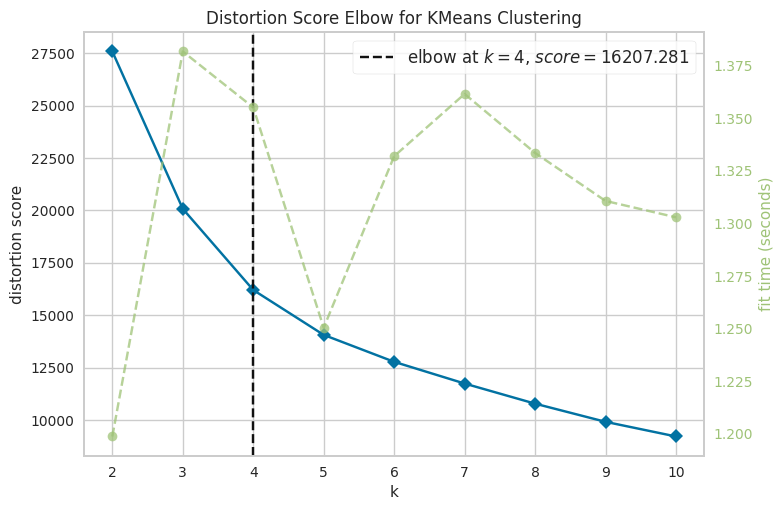

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
# Determine the number of clusters using the Elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

The plot shows that 4 will be the optimal number of clusters. 

Now, I will fit the PCA dataframe to the K-means clustering model

In [113]:
# define the model
model = KMeans(n_clusters=4)
model.fit(PCA_df)
pred = model.predict(PCA_df)

# result
# adding the Clusters feature to the PCA dataframe.
PCA_df['Clusters'] = pred
PCA_df['Clusters'] = PCA_df['Clusters'].astype(str)
# adding the Clusters feature to the orignal dataframe.
df['Clusters'] = pred
df['Clusters'] = df['Clusters'].astype(str)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Plot the clusters in 3D using plotly

In [114]:
# Plotting the clusters
colors = [
    "#F0810F",  # Orange
    "#063852",  # Blueberry
    "#E6DF44",  # Lemon
    "#800080"   # Purple
]

fig = px.scatter_3d(PCA_df, x='dim1', y='dim2', z='dim3',
              color='Clusters',color_discrete_sequence=colors, opacity=0.6, symbol = 'Clusters')

# Adjust the size of the data points
fig.update_traces(marker=dict(size=2))

fig.update_layout(title="Plot of Clusters", height=600, width=800)
fig.show()

# EXAMINING CLUSTERS
In this section, I will study the characteristics of each cluster through exploratory data analysis (EDA)

I will first study the distribution of the clusters

In [115]:
fig = px.histogram(df, x='Clusters', color='Clusters', color_discrete_sequence=colors)
fig.show()

Relatively unequal distribution

In [116]:
fig = px.scatter(df, x="Total_Trans_Ct", y="Total_Trans_Amt", 
                color='Clusters', color_discrete_sequence=colors, opacity=0.8, symbol='Clusters')
fig.update_yaxes(title_text="Total Transaction Amount")
fig.update_xaxes(title_text="Total Transaction Count")
fig.update_traces(showlegend=True)
fig.update_layout(title="Cluster's Profile Based On Total Transaction Count and Total Transaction Amoun")
fig.show()

- **Cluster 1**: high total transaction count & medium/high total transaction amount
- **Cluster 0, 2, 3**: low/medium total transaction count & low total transaction amount

I will examine the detailed distribution of clusters in regards to total transaction amount and credit limit

In [117]:
fig = px.box(df, x="Clusters", y="Total_Trans_Amt", 
             color='Clusters', color_discrete_sequence=colors, points='all')
fig.update_yaxes(title_text="Total Transaction Amount")
fig.update_xaxes(title_text="Clusters")
fig.show()

Group 1 is the highest-spending customer group 

In [118]:
fig = px.box(df, x="Clusters", y="Credit_Limit", color='Clusters', color_discrete_sequence=colors, points='all')
fig.update_yaxes(title_text="Credit Limit")
fig.update_xaxes(title_text="Clusters")
fig.show()

- Group 1 and 2 span across all credit limits

- Customers in group 0 and 3 have low credit limits (mostly equal to or below 10k)

# PROFILING CUSTOMERS
Now, I take a deeper look into each cluster to see which characteristics it has. 

<Figure size 800x550 with 0 Axes>

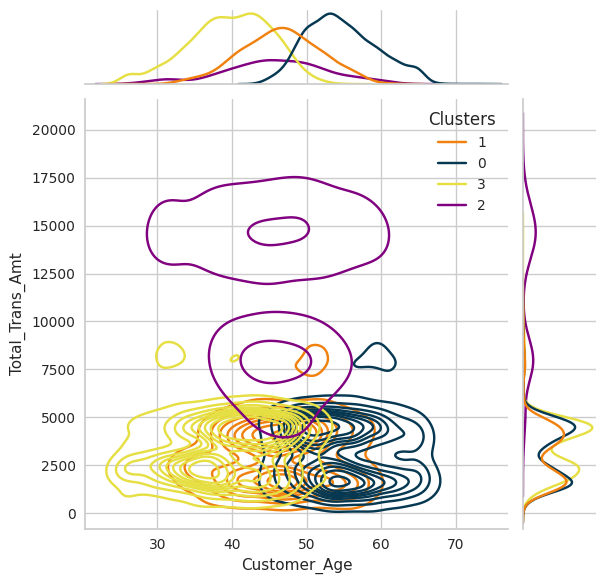

<Figure size 800x550 with 0 Axes>

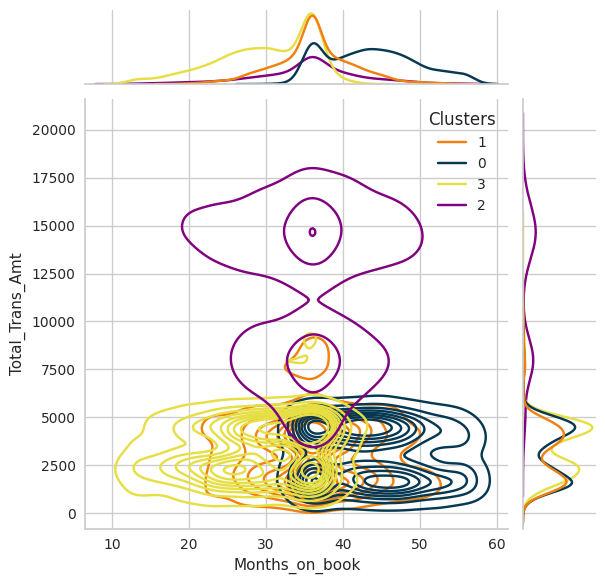

<Figure size 800x550 with 0 Axes>

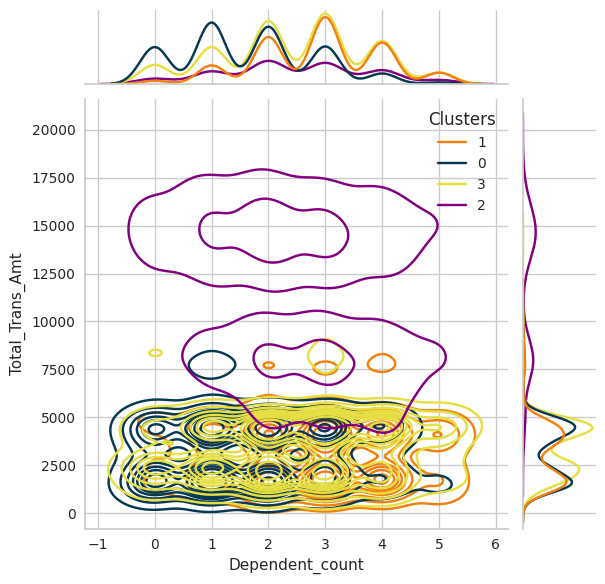

<Figure size 800x550 with 0 Axes>

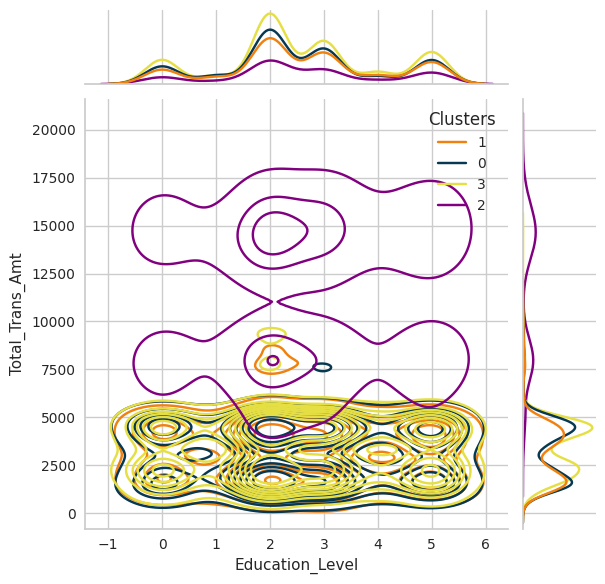

<Figure size 800x550 with 0 Axes>

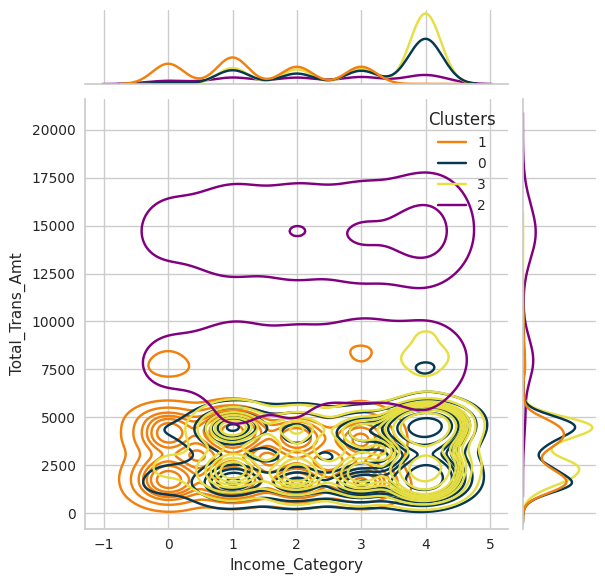

<Figure size 800x550 with 0 Axes>

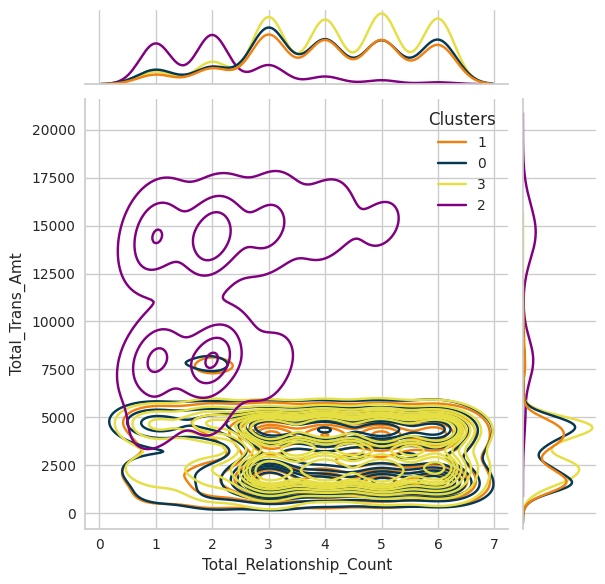

<Figure size 800x550 with 0 Axes>

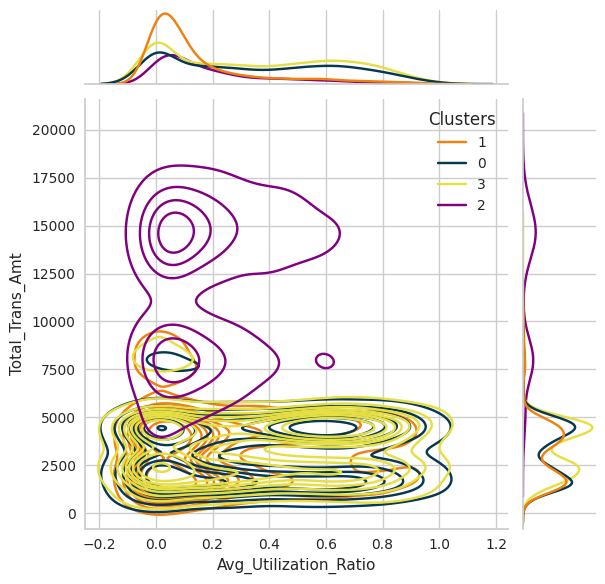

<Figure size 800x550 with 0 Axes>

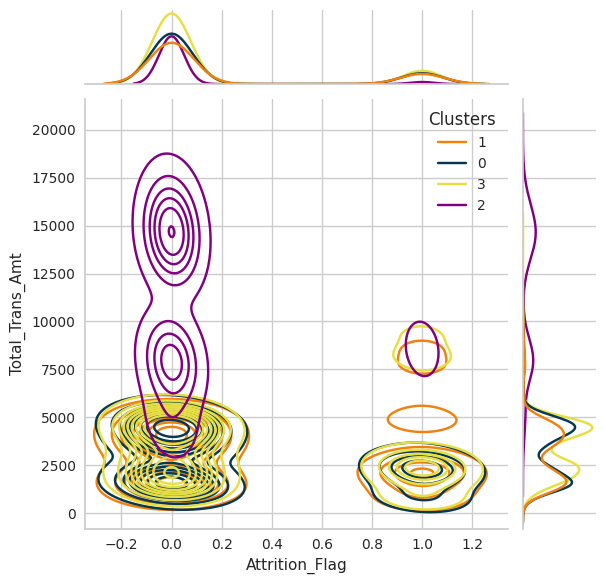

In [119]:
category = ["Customer_Age", "Months_on_book", "Dependent_count", "Education_Level", "Income_Category", "Total_Relationship_Count", "Avg_Utilization_Ratio", 'Attrition_Flag']

for i in category:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Total_Trans_Amt"], hue =df["Clusters"], kind="kde", palette=colors)
    plt.show()

# CUSTOMER PROFILES:
In conclusion, the credit card customers are categorized into 4 groups with the following properties:

**Customer group 0**:
- Middle-aged customers
- low/medium total transaction count & low transaction amount
- More likely to have high credit limits
- Have been on the book for an average amount of time (mostly within 34-38 months)
- Have low average utilization ratio (mostly below 0.2)
- Have high income (mostly above 80000 USD - no one in this group has income below 40000 USD)
- Mostly existing customers 

**Customer group 1**: 
- Middle-aged customers 
- High total transaction count & medium/high total transaction amount
- All span of credit limits (but mostly low/average)
- Have been on the book for an average amount of time (mostly within 30-40 months)
- Span across all income category
- Mostly have only 1-2 relationships with the credit card provider
- Mostly existing customers

**Customer group 2**:
- Older customers
- Low/medium total transaction count & low total transaction amount
- Low credit limit (mostly below 15000 USD)
- Have been on the book for a longer amount of time (mostly over 40 months)
- Have low income (mostly below 40000 USD)
- Mostly have 3-6 relationships with the credit card provider
- Mostly have low dependent counts

**Customer group 3**: 
- Younger customers (mostly within 35-45 years old)
- Low/medium total transaction count and low/medium  total transaction amount
- Low credit limit (mostly below 15000 USD)
- Have been on the book for a shorter amount of time (mostly below 36 months)
- Could be parents of kids/teenagers (indicated by high numbers of dependents)
- Have low income (mostly below 40000 USD)
- Mostly have 3-6 relationships with the credit card provider

# THE END